# I can do something like this in the election, let the user define the probability and let montecarlo simulate the result of the election

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

How many questions are you SURE to get right?  30
How many are you MIDDLE confident about?  30
How many are you TOTALLY GUESSING?  40
How simualation do you want to run eg: 10000  100000


              Format      Mean   Std Dev  P(score ≥ 40)  P(score ≥ 50)
0  Old (60×1 + 20×2)  56.47279  5.858012        0.99800        0.88182
1        New (100×1)  56.47508  4.952032        0.99967        0.92074


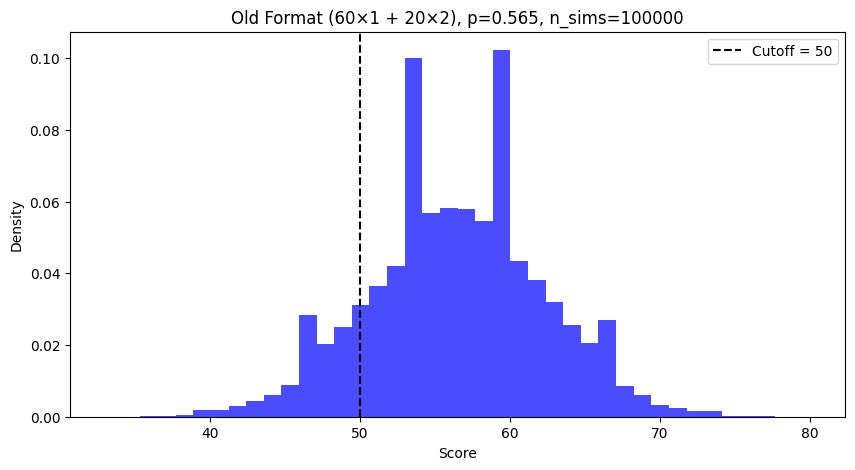

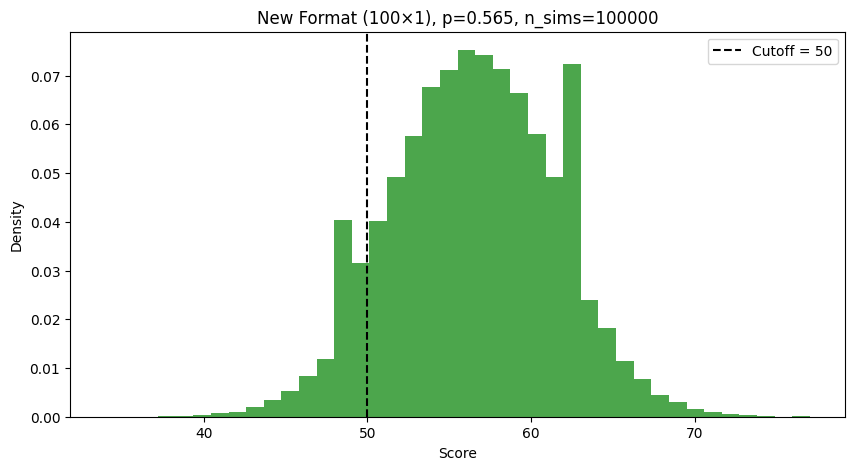

In [1]:
# Monte Carlo simulation with separate graphs for exam formats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
# Compute overall p from just THREE answers:
# 1) # sure-correct   2) # middle-confidence   3) # totally-guess
# You can tweak the per-bucket probabilities below.

p_sure   = 0.95   # probability for "sure to correct"
p_middle = 0.60   # probability for "middle confidence"
p_guess  = 0.25   # probability for "totally unsure / random guess"

n_sure   = int(input("How many questions are you SURE to get right? "))
n_middle = int(input("How many are you MIDDLE confident about? "))
n_guess  = int(input("How many are you TOTALLY GUESSING? "))

total_q = n_sure + n_middle + n_guess
if total_q < 100:
    raise ValueError("Total questions must be > 0.")

weighted_sum = n_sure*p_sure + n_middle*p_middle + n_guess*p_guess
p_equiv = weighted_sum / total_q

p = p_equiv                # probability of correct answer

n_sims  = int(input("How simualation do you want to run eg: 10000 ")) # number of simulated students
rng = np.random.default_rng(123)  # random generator with seed

# --- Old format: 60×1-mark + 20×2-mark ---
X = rng.binomial(60, p, size=n_sims)     # correct 1-mark questions
Y = rng.binomial(20, p, size=n_sims)     # correct 2-mark questions
S_old = X + 2*Y                          # total score

# --- New format: 100×1-mark ---
Z_new = rng.binomial(100, p, size=n_sims)

# --- Compute stats ---
def summary(arr, label):
    return {
        "Format": label,
        "Mean": arr.mean(),
        "Std Dev": arr.std(ddof=0),
        "P(score ≥ 40)": (arr >= 40).mean(),
        "P(score ≥ 50)": (arr >= 50).mean(),
    }

results = [
    summary(S_old, "Old (60×1 + 20×2)"),
    summary(Z_new, "New (100×1)")
]

df = pd.DataFrame(results)
print(df)

# --- Graphs ---

# Old format
plt.figure(figsize=(10,5))
plt.hist(S_old, bins=40, alpha=0.7, color="blue", density=True)
plt.axvline(50, color="black", linestyle="--", label="Cutoff = 50")
plt.xlabel("Score")
plt.ylabel("Density")
plt.title(f"Old Format (60×1 + 20×2), p={p}, n_sims={n_sims}")
plt.legend()
plt.show()

# New format
plt.figure(figsize=(10,5))
plt.hist(Z_new, bins=40, alpha=0.7, color="green", density=True)
plt.axvline(50, color="black", linestyle="--", label="Cutoff = 50")
plt.xlabel("Score")
plt.ylabel("Density")
plt.title(f"New Format (100×1), p={p}, n_sims={n_sims}")
plt.legend()
plt.show()

